# K-Means Clustering
### K-Means Clustering is an unsupervised learning algorithm that partitions data into a predefined number of clusters by minimizing the variance within each cluster, based on the mean distance of data points. It excels in grouping similar customers (e.g., segmenting mall shoppers based on annual income and spending score) and can be applied to various data types, requiring no labeled data beyond initializing cluster centroids. The algorithm assumes that clusters are spherical and of similar size, which simplifies computation but may not hold for all real-world datasets with complex shapes. Its strength lies in its simplicity and scalability with medium-sized datasets, but it can be sensitive to initial centroid placement and the choice of k, necessitating careful selection for optimal performance.

### Use K-Means Clustering as a starting point for unsupervised learning prototypes, with the elbow method or silhouette analysis to determine k, particularly for deployment in customer segmentation or market analysis systems.

| Aspect | Details |
| :- | :- |
| Use For           | Customer segmentation (e.g., mall shopper grouping, market basket analysis)<br>Can be extended to image compression or anomaly detection |
| Key Assumptions   | - Clusters are spherical and of similar size<br>- Independent observations<br>- Sufficient data for meaningful cluster separation |
| Advantages        | - Simple and computationally efficient for medium datasets<br>- Effective for identifying natural groupings<br>- Requires no labeled data |
| Disadvantages     | - Sensitive to initial centroid placement<br>- Requires careful choice of k<br>- Struggles with non-spherical or overlapping clusters |
| Avoid When        | - Datasets with irregular or non-spherical cluster shapes<br>- Very small samples with limited variability<br>- Need for highly interpretable models |
| Real-World Use Case | Mall customer segmentation (e.g., grouping shoppers by income and spending behavior)<br>Image compression (e.g., reducing pixel data into clusters) |

## Problem Description: 
### Segment mall customers into distinct groups based on annual income and spending score to tailor marketing strategies. This is an unsupervised learning problem where K-Means identifies clusters without labeled data.

Using Kaggle dataset https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

In [6]:
project_dir = './09_k_means_clustering'

# load  dataset
data = pd.read_csv(project_dir + '/data/Mall_Customers.csv')
print("Dataset loaded, shape:", data.shape)

# select relevant features
features = ['Annual Income (k$)', 'Spending Score (1-100)']

X = data[features]
print("Features shape:", X.shape)

# scale features for better K-Means performance (needed because of distance-based clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Dataset loaded, shape: (200, 5)
Features shape: (200, 2)


In [7]:
# determine the optimal number of clusters using the elbow method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

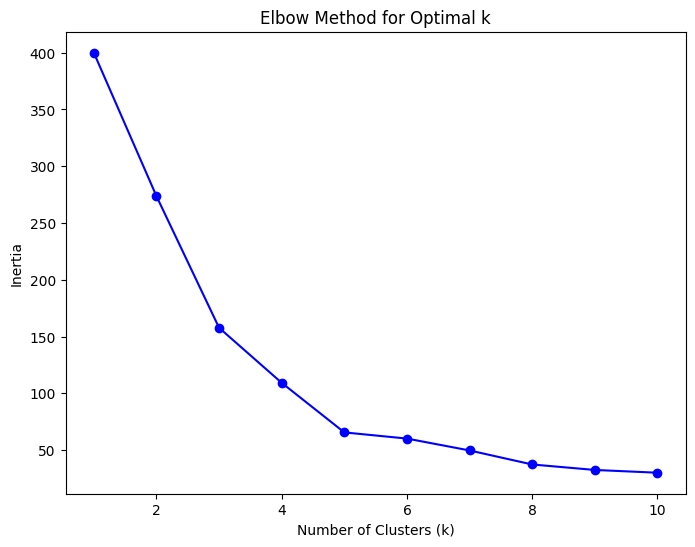

In [8]:
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [9]:
# train the K-Means model with the optimal number of clusters
optimal_k = 3  # adjust based on elbow plot (typically 3-5 for this dataset)
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_model.fit(X_scaled)


# add cluster labels to the original data
data['Cluster'] = kmeans_model.labels_

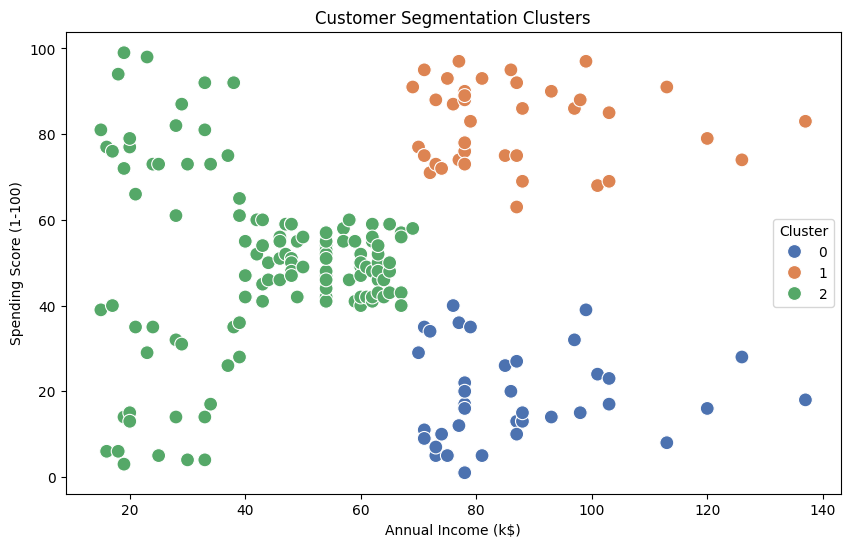

In [12]:
# visualize the clusters
plt.figure(figsize=(10, 6)), 
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='deep', s=100)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation Clusters')
plt.legend(title='Cluster')
plt.show()

In [ ]:
# save the trained model to a file using joblib for later use
model_dir = project_dir + '/model' 
os.makedirs(model_dir, exist_ok=True)
model_filename = os.path.join(model_dir, 'mall_customer_kmeans_model.pkl')
scaler_filename = os.path.join(model_dir, 'mall_customer_scaler.pkl')
joblib.dump(kmeans_model, model_filename)
joblib.dump(scaler, scaler_filename)
print(f'Model saved as {model_filename}')
print(f'Scaler saved as {scaler_filename}')

Model saved as ./09_k_means_clustering/model/mall_customer_kmeans_model.pkl
Scaler saved as ./09_k_means_clustering/model/mall_customer_scaler.pkl


In [17]:
# load the model and scaler, and run a prediction test
loaded_model = joblib.load(model_filename)
loaded_scaler = joblib.load(scaler_filename)
sample_data = pd.DataFrame(
    [[150, 20]],  # Annual Income (k$)', Spending Score (1-100)
    columns=features
)
sample_input_scaled = loaded_scaler.transform(sample_data)
sample_cluster = loaded_model.predict(sample_input_scaled)
print(f'Predicted Cluster for sample input: {sample_cluster[0]}')

Predicted Cluster for sample input: 0
